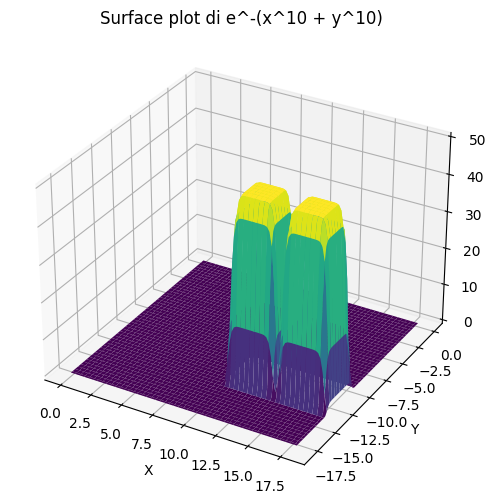

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def f(x, y, xc, yc, p=10, s=1, a=1):
    return a*np.exp(-((x-xc)**p + (y-yc)**p)/((2.0*s)**p))

# Creazione della griglia di punti
x = np.linspace(0, 18, 100)
y = np.linspace(0, -18, 100)
x, y = np.meshgrid(x, y)
pp = 10
ss = 0.9
aa=50
z = f(x, y, 12, -12, p=pp, s=ss, a=aa)
z += f(x, y, 16, -12, p=pp, s=ss, a=aa)

# Creazione della figura
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot della superficie
ax.plot_surface(x, y, z, cmap='viridis', edgecolor='none')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Surface plot di e^-(x^10 + y^10)')

plt.show()
